# Import libraries

In [156]:
import keras.metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# nltk.download('stopwords')
# nltk.download('punkt')

# Load data

In [157]:
data = pd.read_csv("spam_ham_dataset.csv")

In [158]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [159]:
data = data.drop(["Unnamed: 0"], axis=1)

This dataset has 5171 entries

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5171 non-null   object
 1   text       5171 non-null   object
 2   label_num  5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


There is two times more emails which are not a spam than spam emails

<AxesSubplot: xlabel='label_num', ylabel='count'>

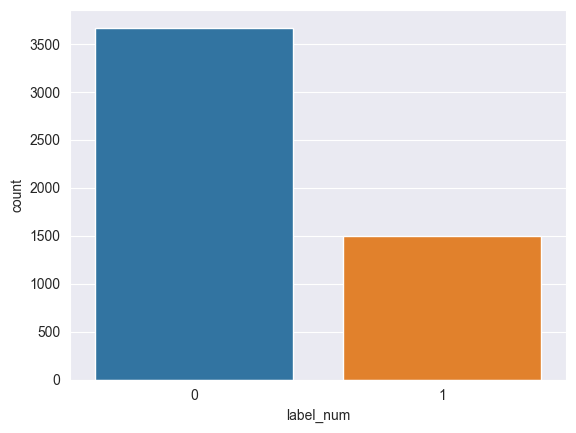

In [161]:
sns.countplot(data, x="label_num")

# Simple "model" always predict 0

# Split data

In [162]:
X = data.loc[:, "text"]
y = data.loc[:, "label_num"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Evaluation

Accuracy: 0.714975845410628
Precision: 0.0
Recall: 0.0
F1: 0.0


C:\PycharmProjects\nlp_lab\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


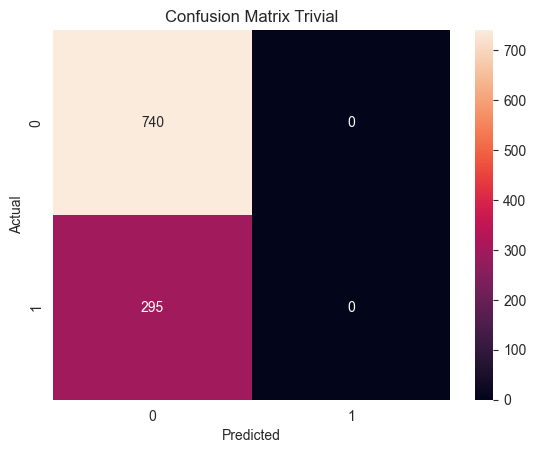

In [163]:
y_predicted = np.full(len(y_test), 0)

accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)

cm = confusion_matrix(y_test, y_predicted)
print(f"Accuracy: {accuracy}\n"
      f"Precision: {precision}\n"
      f"Recall: {recall}\n"
      f"F1: {f1}")
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.title("Confusion Matrix Trivial")
plt.show()

# Simple "model" always predict 1 evaluation

Accuracy: 0.28502415458937197
Precision: 0.28502415458937197
Recall: 1.0
F1: 0.443609022556391


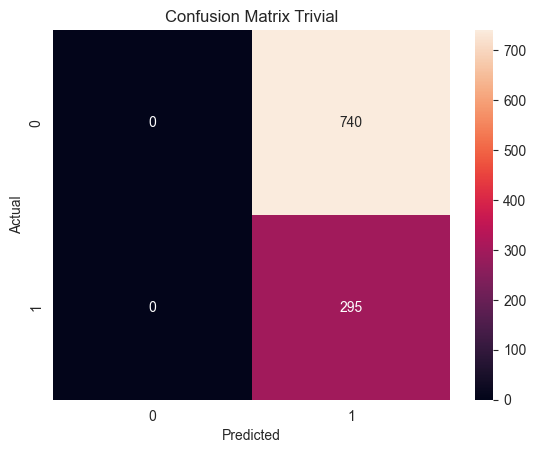

In [164]:
y_predicted = np.full(len(y_test), 1)

accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)

cm = confusion_matrix(y_test, y_predicted)
print(f"Accuracy: {accuracy}\n"
      f"Precision: {precision}\n"
      f"Recall: {recall}\n"
      f"F1: {f1}")
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.title("Confusion Matrix Trivial")
plt.show()

# Naive Bayes model

# Without stopwords

# Split data

In [173]:
X = data.loc[:, "text"]
y = data.loc[:, "label_num"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [174]:
X_train.shape

(4136,)

In [175]:
X_test.shape

(1035,)

# Get best model

In [176]:
vectorizer = CountVectorizer().fit(X_train)
X_train_vectorized_NB = vectorizer.transform(X_train)

In [177]:
model = MultinomialNB()
param={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}
search = GridSearchCV(model,param,scoring='f1',cv=10,return_train_score=True)

In [178]:
search.fit(X_train_vectorized_NB, y_train)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.1, 1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='f1')

In [179]:
search.cv_results_

{'mean_fit_time': array([0.00420694, 0.00403109, 0.00377598, 0.00870986, 0.00488727,
        0.00357728, 0.00396965, 0.00378129]),
 'std_fit_time': array([0.00061373, 0.00056467, 0.00051919, 0.00903485, 0.00071944,
        0.00043314, 0.00093795, 0.00050136]),
 'mean_score_time': array([0.00123372, 0.00105052, 0.00112536, 0.00165408, 0.00146065,
        0.00116038, 0.0010623 , 0.00117664]),
 'std_score_time': array([0.00039094, 0.00015138, 0.00018475, 0.00075283, 0.00074896,
        0.00022741, 0.00028898, 0.0002925 ]),
 'param_alpha': masked_array(data=[1e-05, 0.0001, 0.001, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 1e-05},
  {'alpha': 0.0001},
  {'alpha': 0.001},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 100},
  {'alpha': 1000}],
 'split0_test_score': array([0.95473251, 0.95473251, 0.95081967, 0.95473251, 0.94957983,
        0.76767

In [180]:
search.best_estimator_

MultinomialNB(alpha=0.001)

In [181]:
model = search.best_estimator_

# Evaluation

Accuracy: 0.9816425120772947
Precision: 0.9686411149825784
Recall: 0.9652777777777778
F1: 0.9669565217391305


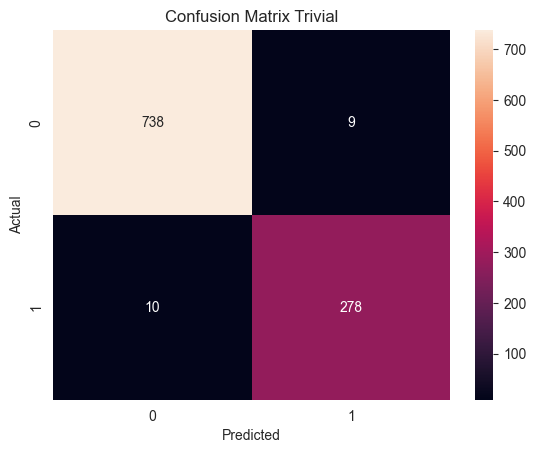

In [182]:
X_test_vectorized_NB = vectorizer.transform(X_test)
y_predicted = model.predict(X_test_vectorized_NB)

accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)

cm = confusion_matrix(y_test, y_predicted)
print(f"Accuracy: {accuracy}\n"
      f"Precision: {precision}\n"
      f"Recall: {recall}\n"
      f"F1: {f1}")
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.title("Confusion Matrix Trivial")
plt.show()

# With stopwords

In [183]:
stop_words = set(stopwords.words('english'))

data_copy = data.copy()
data_copy['text'] = data_copy['text'].apply(lambda x: ' '.join([ word for word in word_tokenize(x)  if not word in stop_words]))

# Split data

In [184]:
X = data_copy.loc[:, "text"]
y = data_copy.loc[:, "label_num"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2)

# Get best model

In [185]:
vectorizer2 = CountVectorizer().fit(X_train2)
X_train_vectorized_NB2 = vectorizer2.transform(X_train2)

In [186]:
model2 = MultinomialNB()
param = {'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000]}
search2 = GridSearchCV(model2, param, scoring='f1', cv=10, return_train_score=True)
search2.fit(X_train_vectorized_NB2, y_train2)
model2 = search2.best_estimator_

In [187]:
search2.best_estimator_

MultinomialNB(alpha=0.0001)

In [188]:
search2.cv_results_

{'mean_fit_time': array([0.00344262, 0.0033402 , 0.00329916, 0.00327048, 0.00463793,
        0.00327995, 0.00297456, 0.00303326]),
 'std_fit_time': array([0.00054528, 0.00027949, 0.00048132, 0.00031415, 0.00162165,
        0.00060456, 0.00044186, 0.00031411]),
 'mean_score_time': array([0.00097878, 0.00095336, 0.00110772, 0.00101333, 0.00173862,
        0.00122674, 0.00100176, 0.00115411]),
 'std_score_time': array([3.65047436e-04, 2.69418101e-04, 4.22911758e-04, 1.87521328e-05,
        5.57885741e-04, 3.12814880e-04, 3.72077383e-04, 2.27903946e-04]),
 'param_alpha': masked_array(data=[1e-05, 0.0001, 0.001, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 1e-05},
  {'alpha': 0.0001},
  {'alpha': 0.001},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 100},
  {'alpha': 1000}],
 'split0_test_score': array([0.94067797, 0.94067797, 0.94067797, 0.94117

# Evaluation

Accuracy: 0.9806763285024155
Precision: 0.970873786407767
Recall: 0.9646302250803859
F1: 0.9677419354838709


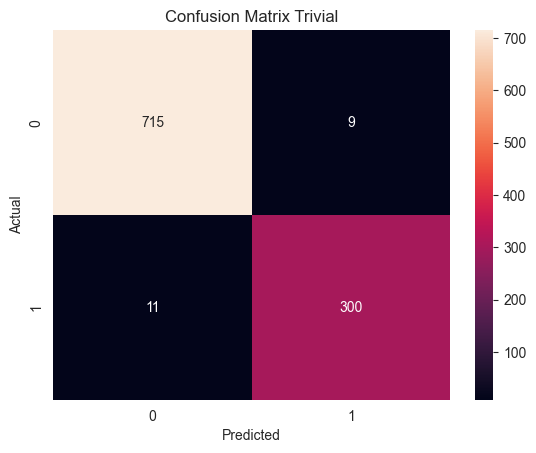

In [189]:
X_test_vectorized_NB2 = vectorizer2.transform(X_test2)
y_predicted = model2.predict(X_test_vectorized_NB2)

accuracy = accuracy_score(y_test2, y_predicted)
precision = precision_score(y_test2, y_predicted)
recall = recall_score(y_test2, y_predicted)
f1 = f1_score(y_test2, y_predicted)

cm = confusion_matrix(y_test2, y_predicted)
print(f"Accuracy: {accuracy}\n"
      f"Precision: {precision}\n"
      f"Recall: {recall}\n"
      f"F1: {f1}")
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.title("Confusion Matrix Trivial")
plt.show()

# BI LSTM

In [149]:
X = data_copy.loc[:, "text"]
y = data_copy.loc[:, "label_num"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2)

In [150]:
from keras.preprocessing.text import Tokenizer

vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train2)

word_index = tokenizer.word_index
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 10000


In [151]:
from tensorflow.keras.utils import pad_sequences
MAX_SEQUENCE_LENGTH = 50
X_train2 = pad_sequences(tokenizer.texts_to_sequences(X_train2), maxlen = MAX_SEQUENCE_LENGTH)
X_test2 = pad_sequences(tokenizer.texts_to_sequences(X_test2), maxlen = MAX_SEQUENCE_LENGTH)


In [152]:
print("Training X Shape:", X_train2.shape)
print("Testing X Shape:", X_test2.shape)

Training X Shape: (4136, 50)
Testing X Shape: (1035, 50)


In [154]:
from keras.callbacks import EarlyStopping

drop_lstm =0.37

import tensorflow as tf

model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64, input_length=MAX_SEQUENCE_LENGTH),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(drop_lstm),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model1.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics = [tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), 'accuracy'])
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model1.fit(X_train2,
                     y_train2,
                     epochs=num_epochs,
                     validation_data=(X_test2, y_test2),
                     callbacks =[early_stop],
                     verbose=1)

Epoch 1/30
130/130 [==============================] - 11s 46ms/step - loss: 0.2484 - precision_15: 0.8982 - recall_14: 0.7041 - accuracy: 0.8907 - val_loss: 0.0890 - val_precision_15: 0.8954 - val_recall_14: 0.9831 - val_accuracy: 0.9623
Epoch 2/30
130/130 [==============================] - 5s 37ms/step - loss: 0.0250 - precision_15: 0.9811 - recall_14: 0.9900 - accuracy: 0.9915 - val_loss: 0.0699 - val_precision_15: 0.9721 - val_recall_14: 0.9426 - val_accuracy: 0.9758
Epoch 3/30
130/130 [==============================] - 5s 36ms/step - loss: 0.0051 - precision_15: 0.9967 - recall_14: 0.9975 - accuracy: 0.9983 - val_loss: 0.0779 - val_precision_15: 0.9729 - val_recall_14: 0.9696 - val_accuracy: 0.9836
Epoch 4/30
130/130 [==============================] - 5s 37ms/step - loss: 0.0032 - precision_15: 1.0000 - recall_14: 0.9983 - accuracy: 0.9995 - val_loss: 0.0823 - val_precision_15: 0.9701 - val_recall_14: 0.9865 - val_accuracy: 0.9874


33/33 [==============================] - 1s 11ms/step
Accuracy: 0.9874396135265701
Precision: 0.9700996677740864
Recall: 0.9864864864864865
F1: 0.9782244556113903


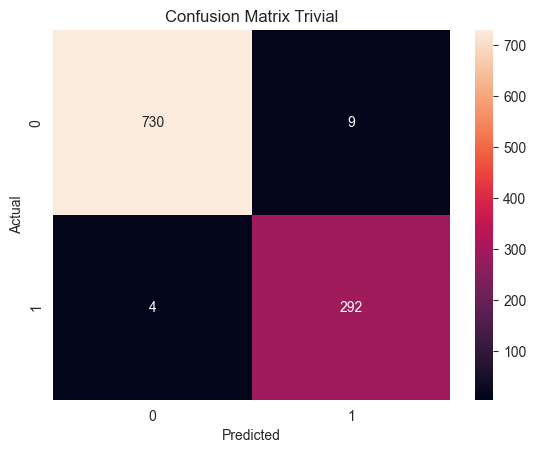

In [155]:
y_predicted = model1.predict(X_test2) > 0.5

accuracy = accuracy_score(y_test2, y_predicted)
precision = precision_score(y_test2, y_predicted)
recall = recall_score(y_test2, y_predicted)
f1 = f1_score(y_test2, y_predicted)

cm = confusion_matrix(y_test2, y_predicted)
print(f"Accuracy: {accuracy}\n"
      f"Precision: {precision}\n"
      f"Recall: {recall}\n"
      f"F1: {f1}")
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.title("Confusion Matrix Trivial")
plt.show()